In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import copy
import time

# Data Preprocess

External Data

In [2]:
# Note: Use Fama Data Date as Trading Date List, Some Dates in Stock Data are NOT Trading Days
fama = pd.read_csv(r"C:\Users\Kran\Desktop\data\FamaFrench.csv").set_index("date")
tradingdate = fama.index

Stock Specific Data

In [3]:
data = pd.read_csv(r"C:\Users\Kran\Desktop\data\Market.csv", dtype=dict(zip(['PERMNO', 'date', 'TICKER', 'TRDSTAT', 'SECSTAT', 'DLSTCD', 'PRC', 'RET', 'SHROUT'], [int, int, str, str, str, float, str, str])))

In [5]:
data["PRC"] = data.PRC.astype(float)

In [9]:
# Special Character "B" and "C" in columns
data["RET"] = data.RET.replace({"B": "-100", "C": "-200"})
data["RET"] = data.RET.astype(float)
data.loc[data[data["RET"] < -99].index, "RET"] = np.nan

In [10]:
data["SHROUT"] = data.SHROUT.astype(float)

In [13]:
# Split Data by PERMNO
datalist = [(companyid, companytable.sort_values("date").set_index("date").reindex(tradingdate)) for companyid, companytable in data.groupby("PERMNO")]
datalist = dict(datalist)

In [14]:
stkid = list(datalist.keys())

# Check Anomaly

In [16]:
# EXAMPLE
# How to Do Something in the DICT
# Here Check Whether TICKER is Constant
check = [(key, (table.TICKER == table.TICKER.iloc[0]).all()) for key, table in datalist.items()]

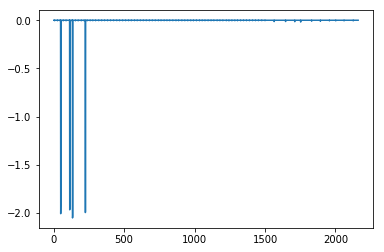

In [21]:
# EXAMPLE
# Check Divident
temp = datalist[stkid[0]].copy()
# Note Here, Better to Use Copy
temp["cmp"] = temp.PRC / temp.PRC.shift(1) - 1 -temp.RET
temp.cmp.plot(use_index=False)
plt.show()

In [22]:
temp[temp.cmp < -1]

,PERMNO,TICKER,TRDSTAT,SECSTAT,DLSTCD,PRC,RET,SHROUT,cmp
date,,,,,,,,,
20090317,10001.0,EWST,A,R,NaN,-8.025,0.003125,4297.0,-2.006250
20090318,10001.0,EWST,A,R,NaN,7.620,-0.050467,4297.0,-1.899066
20090617,10001.0,EWST,A,R,NaN,-8.620,-0.017104,4354.0,-1.965792
20090618,10001.0,EWST,A,R,NaN,8.360,-0.030162,4354.0,-1.939676
20090716,10001.0,EWST,A,R,NaN,-8.405,0.025000,4301.0,-2.050000
20090717,10001.0,EWST,A,R,NaN,8.540,0.016062,4301.0,-2.032124
20091123,10001.0,EGAS,A,R,NaN,-8.825,-0.002825,4361.0,-1.994350
20091124,10001.0,EGAS,A,R,NaN,8.750,-0.008499,4361.0,-1.983002


In [135]:
temp.loc[49:]

,PERMNO,date,TICKER,TRDSTAT,SECSTAT,DLSTCD,PRC,RET,SHROUT,cmp
49,10001,20090316,EWST,A,R,NaN,8.0000,0.001252,4297.0,-4.355444e-07
50,10001,20090317,EWST,A,R,NaN,-8.0250,0.003125,4297.0,-2.006250e+00
51,10001,20090318,EWST,A,R,NaN,7.6200,-0.050467,4297.0,-1.899066e+00
52,10001,20090319,EWST,A,R,NaN,7.7200,0.013123,4297.0,3.595801e-07
53,10001,20090320,EWST,A,R,NaN,7.4300,-0.037565,4297.0,2.331606e-07
54,10001,20090323,EWST,A,R,NaN,7.0200,-0.055182,4297.0,3.041723e-07
55,10001,20090324,EWST,A,R,NaN,7.5200,0.071225,4297.0,7.122507e-08
56,10001,20090325,EWST,A,R,NaN,7.7600,0.031915,4297.0,-1.063830e-07
57,10001,20090326,EWST,A,R,NaN,7.5000,-0.033505,4297.0,-1.546392e-07
58,10001,20090327,EWST,A,R,NaN,7.7000,0.026667,4297.0,-3.333333e-07


# Construct Factor

In [25]:
def AddLogSizeFactor(df):
    '''Shares outstanding "SHROUT" and closing price "PRC" in df are REQUIRED'''
    try:
        df["LogSize"] = np.log(df.SHROUT * df.PRC * 1000)
    except Exception as e:
        print("Failed to Construct LogSize for Stock " + df.TICKER.iloc[-1])
        print(str(e))

In [26]:
def AddMomentumFactor(df, fama):
    '''Daily return "RET" in df and daily risk-free return "rf" in fama are REQUIRED'''
    try:
        #df["Momentum"] = (np.sum(np.log(df.RET + 1) - np.log(fama.rf + 1))).rolling(252).sum()
        df["Momentum"] = (np.log(df.RET + 1) - np.log(fama.rf + 1)).rolling(252).sum()
    except Exception as e:
        print("Failed to Construct Momentum for Stock " + df.TICKER.iloc[-1])
        print(str(e))        

In [27]:
# Add Factors
for table in datalist.values():
    AddLogSizeFactor(table)
    AddMomentumFactor(table, fama)

C:\Users\Kran\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


# Fama-Macbeth Regression

In [33]:
# Convert Data to Multi-Index Data
datalist = pd.concat(datalist.values(), keys=datalist.keys())

In [39]:
factorname = ["LogSize", "Momentum"]
regression = ["RET"] + factorname
daynum = len(tradingdate)
stknum = len(stkid)

In [40]:
dataview = datalist[regression].copy()
# Use Factor of Last Day
dataview[factorname] = dataview[factorname].groupby(level=0).shift(1)

In [41]:
# EXAMPLE
# How to Extract Data for a Certain Date
dataview.iloc[[i * daynum + 1000 for i in range(stknum)]].dropna()

,,RET,LogSize,Momentum
,date,,,
10001,20121221,0.004242,18.158283,-0.101491
10002,20121221,-0.005348,17.735395,0.687676
10025,20121221,0.006793,19.550159,0.738355
10026,20121221,-0.000630,20.899706,0.219215
10032,20121221,-0.010588,20.608622,-0.056930
10044,20121221,0.001837,18.003414,0.237392
10051,20121221,-0.001836,20.653458,0.465092
10065,20121221,-0.008459,20.692155,0.195964
10100,20121221,-0.040200,14.715672,-1.236075


In [42]:
x = dataview.iloc[[i * daynum + 1500 for i in range(stknum)]].dropna()
sm.OLS(x.iloc[:, 0], x.iloc[:, 1:]).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    RET   R-squared:                       0.328
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     1532.
Date:                Thu, 29 Nov 2018   Prob (F-statistic):               0.00
Time:                        13:03:13   Log-Likelihood:                 12083.
No. Observations:                6291   AIC:                        -2.416e+04
Df Residuals:                    6289   BIC:                        -2.415e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
LogSize        0.0011   2.23e-05     50.548      0.000       0.001       0.001
Momentum      -0.0199      0.001    -18.356      0.000      -0.022      -0.018
==============================================================================
Omnibus:                     3894.559   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           282214.326
Skew:                           2.178   Prob(JB):                         0.00
Kurtosis:                      35.522   Cond. No.                         48.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
# Regress!
index = pd.Index([i * daynum for i in range(stknum)])
regviewraw = {tradingdate[shift]: dataview.iloc[index + shift].dropna().reset_index(level=1, drop=1) for shift in range(daynum)}
# Winsorize to 95%
regview = {key: view.clip(lower=view.quantile(0.025), upper=view.quantile(0.975), axis=1) for key, view in regviewraw.items()}
regresult = {key: sm.OLS(view.iloc[:, 0], view.iloc[:, 1:]).fit() for key, view in regview.items() if len(view) > len(regression)}

In [44]:
factorreturn = {key: value.params for key, value in regresult.items()}
factorreturn = pd.concat(factorreturn, axis=1).transpose().reindex(tradingdate)

In [609]:
residual = {key: value.resid.reindex(stkid) for key, value in regresult.items()}
residual = pd.concat(residual, axis=1).transpose().reindex(tradingdate)

In [46]:
factorreturn.corr()

,LogSize,Momentum
LogSize,1.000000,-0.107696
Momentum,-0.107696,1.000000


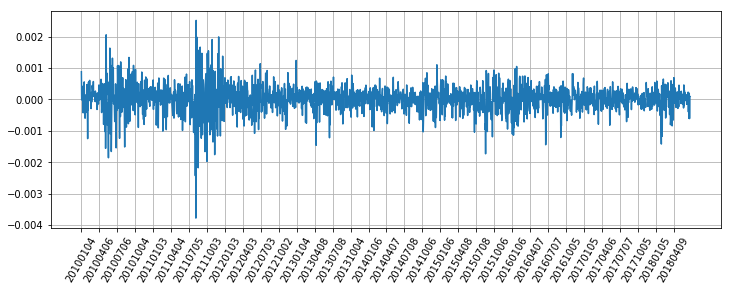

In [47]:
plt.figure(figsize=(12, 4))
plt.plot(factorreturn.dropna().LogSize.reset_index(drop=1))
plt.xticks(range(0, 2100, 63), factorreturn.dropna().index[range(0, 2100, 63)], rotation=60)
plt.grid()
plt.show()

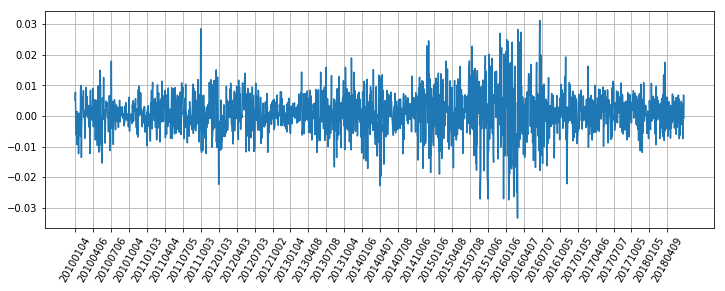

In [48]:
plt.figure(figsize=(12, 4))
plt.plot(factorreturn.dropna().Momentum.reset_index(drop=1))
plt.xticks(range(0, 2100, 63), factorreturn.dropna().index[range(0, 2100, 63)], rotation=60)
plt.grid()
plt.show()

CAPM-GLS

In [49]:
factorreturn.mean() / factorreturn.std() * np.sqrt(len(factorreturn.dropna()))

LogSize     1.200732
Momentum    6.386923
dtype: float64

In [50]:
rsq = {key: value.rsquared for key, value in regresult.items()}
rsq = pd.Series(rsq)

In [51]:
(rsq.mean() - 0.13) / rsq.std() * len(rsq)

45.57477397839803

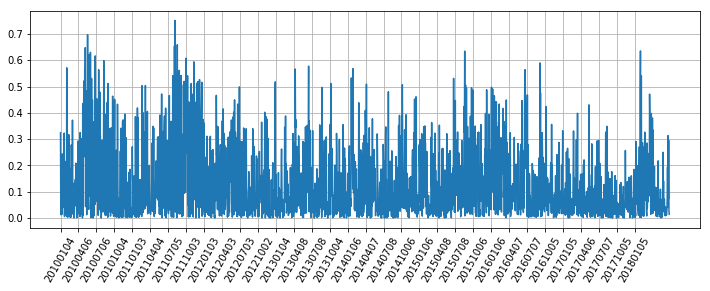

In [52]:
plt.figure(figsize=(12, 4))
plt.plot(rsq.reset_index(drop=1))
plt.xticks(range(0, 2050, 63), rsq.index[range(0, 2050, 63)], rotation=60)
plt.grid()
plt.show()

# Covariance Matrix

In [53]:
factorcov = factorreturn.ewm(halflife=63, min_periods=63).cov()
factorcov.index.names = ["date", "factor"]

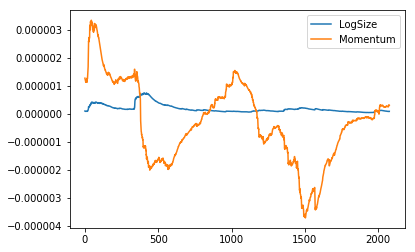

In [54]:
factorcov.xs("LogSize", level="factor").dropna().plot(use_index=False)
plt.show()

# Historic Forecast

In [784]:
forecast_facrtn = factorreturn.ewm(halflife=504, min_periods=504).mean()
# Shift by 1, Use Return Available Today, Multiply Factor Today
forecast_facrtn = forecast_facrtn.shift(1)
forecast_facrtn = {forecast_facrtn.index[i]: forecast_facrtn.iloc[i] for i in range(len(forecast_facrtn))}

In [785]:
dataview["RetForecast"] = np.nan
for shift, date in enumerate(tradingdate):
    dataview.values[index + shift, 3] = regviewraw[date][factorname].dot(forecast_facrtn[date].transpose()).reindex(stkid).values

In [786]:
dataview["se"] = (dataview.RET - dataview.RetForecast) ** 2
dataview["ss"] = dataview.RET ** 2
ss = dataview[["se", "ss"]].dropna().groupby(level=1).sum()

In [787]:
(1 - ss.se / ss.ss).mean() / (1 - ss.se / ss.ss).std() * np.sqrt(len(ss))

0.7026278863713622

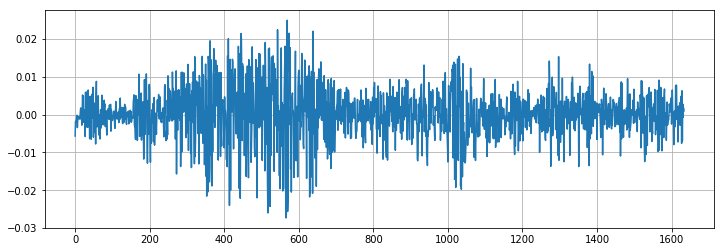

In [790]:
(1 - ss.se / ss.ss).plot(use_index=False, figsize=(12, 4))
plt.grid()
plt.show()